In [2]:
from PIL import Image
from time import sleep
import datetime
import numpy
import pandas
import pyautogui
import re

from pyautogui import (moveTo, click, doubleClick, 
                       locateOnScreen, screenshot, 
                       size, position, Point)
import pytesseract as ocr
from twilio.rest import Client

In [3]:
# get timestamp to create timed-screenshot
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# Phase 1

### Auto-click *Battle.net* and *Play* button

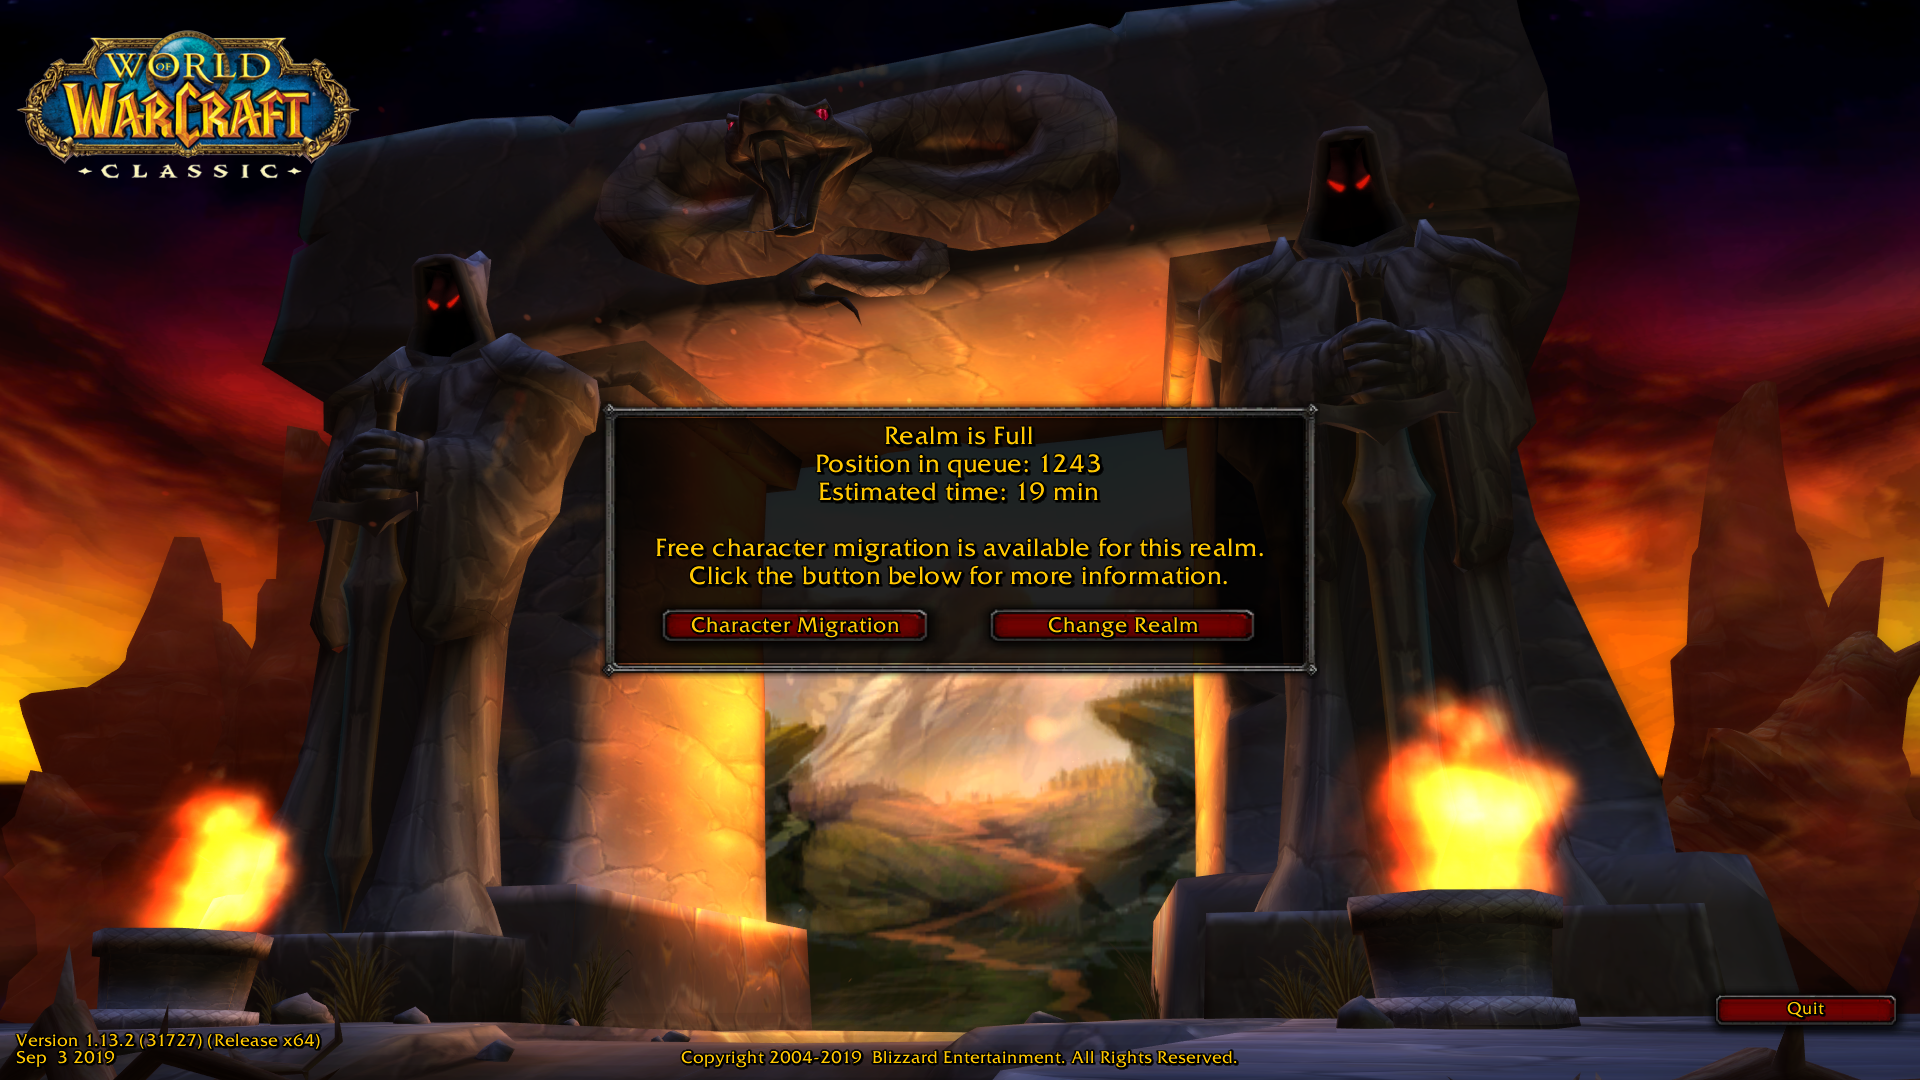

In [3]:
# Get coordinates 
battle_net_coords = Point(x=1000, y=1050)
play_button_coords = Point(x=900, y=800)

# move and click on battle.net icon on my desktop toolbar
moveTo(battle_net_coords, duration= 2)
click(battle_net_coords)
sleep(5)

# move and click on Play button
moveTo(play_button_coords, duration= 2)
click(play_button_coords)
sleep(10)

# move to realm position and double-click it.
realm_coords = Point(x=635, y=275)
moveTo(realm_coords, duration= 2)
doubleClick(realm_coords)

# Wait for the queue image to appear for a while.
sleep(10)

# save image
screenshot(imageFilename=f'screenshots/stallag_queue_{timestamp}.png')

# Phase 2

### Use OCR to extract text from image
#### NOTE: Installing pytesseract on windows may be somehow difficult. Follow instructions:
- https://github.com/UB-Mannheim/tesseract/wiki
- https://www.youtube.com/watch?v=haHuVAUGY5Y

In [4]:
phrase = ocr.image_to_string(Image.open(f'screenshots/stallag_queue_{timestamp}.png'), )
position_queue = re.findall('Position in queue: \d+', phrase)
estimated_time = re.findall('Estimated time: \d+ \w+', phrase)

In [5]:
position_queue

['Position in queue: 1243']

In [6]:
msg = ''

# guarantee you'll only send the message if there's something in it.
if len(position_queue) > 0 and len(estimated_time) > 0:
    position_queue = position_queue[0]   
    estimated_time = estimated_time[0]
    msg = f'{position_queue}, {estimated_time}'

# Phase 3

### Send *whatsapp message* via Twilio

In [4]:
import os
import logging
from dotenv import load_dotenv, find_dotenv
from twilio.rest import Client

In [25]:
logging.basicConfig(level=logging.INFO)

def send_whatsapp(to = '11943411836', msg = ''):
    """
    Send a whatsapp message from a default number to a number within the sandbox.
    
    Follow instructions from: https://www.twilio.com/docs/sms/whatsapp/api#sending-notifications
    to get your twilio_account_sid and auth_token
    
    """
    logger = logging.getLogger('messaging.send_whatshapp')
    
    # get environmental variables TWILIO_ACCOUNT_SID and AUTH_TOKEN
    load_dotenv(find_dotenv())
    
    TWILIO_ACCOUNT_SID = os.getenv("TWILIO_ACCOUNT_SID")
    AUTH_TOKEN = os.getenv("AUTH_TOKEN")
    
    if msg == '':
        logger.warning('No message to send')
        return
    
    # client credentials are read from TWILIO_ACCOUNT_SID and AUTH_TOKEN
    client = Client(username=TWILIO_ACCOUNT_SID,
                    password=AUTH_TOKEN)

    # this is the Twilio sandbox testing number
    from_whatsapp_number='whatsapp:+14155238886'
    
    # replace this number with your own WhatsApp Messaging number
    to_whatsapp_number=f'whatsapp:+55{to}'

    logger.info('Sending message...')
    client.messages.create(body=msg,
                           from_=from_whatsapp_number,
                           to=to_whatsapp_number)
    return

send_whatsapp(msg=msg)